<a href="https://colab.research.google.com/github/Ilmaj17/MNIST_DigitClassifier/blob/main/MNIST_DigitClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
%matplotlib inline

##Import data

In [5]:
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


###We have 60000 images of size 28x28 in X_train dataset

##Data visualization

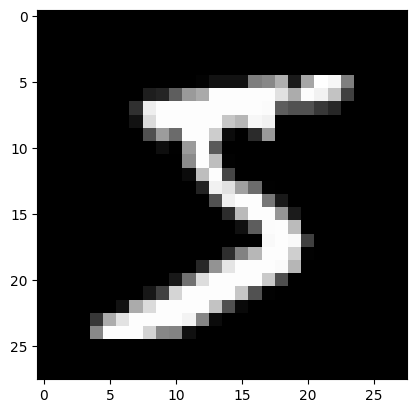

In [6]:
plt.imshow(X_train[0], cmap='gray')

In [7]:
print(y_train[0])

5


In [8]:
unique_values, indices = tf.unique(y_train)
unique_values_np = unique_values.numpy()
print(unique_values)

tf.Tensor([5 0 4 1 9 2 3 6 7 8], shape=(10,), dtype=uint8)


In [9]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

###This is a tensor. This one out of 60000 data that we are going to passthrough our neural network

##Data Preparation
###Data Scaling(let's normalize X_train and X_test)

In [10]:
X_train = tf.keras.utils.normalize(X_train)
X_test = tf.keras.utils.normalize(X_test)
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [11]:
X_train[0].shape

(28, 28)

###Reshaping the 28x28 data element into a 1D array

In [12]:
#X_train = X_train.reshape(X_train.shape[0], -1)
#X_test = X_test.reshape(X_test.shape[0], -1)
#X_train.shape

##Building the model architecture
###The model would contain two hidden layers

In [13]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #Instead of reshaping we can use flatten
#model.add(tf.keras.layers.Dense(units = 128, input_shape = (784,), activation = tf.nn.relu)) #input layer
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)) #hidden layer1
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)) #hidden layer2
model.add(tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax))

###Compile the model

In [14]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
#model.summary() #without the input_shape during model build this command would give an error

###Model training

In [15]:
model.fit(X_train, y_train, epochs = 3)
#batch_size is used to optimize the training process and memory management
#One epoch would consist of 1000 batches each of size 600

Epoch 1/3
1875/1875 [==============================] - 9s 3ms/step - loss: 0.2571 - accuracy: 0.9231
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1051 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0742 - accuracy: 0.9766


In [16]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print("Test loss: ", val_loss, "Test accuracy: ", val_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1076 - accuracy: 0.9657
Test loss:  0.10756168514490128 Test accuracy:  0.9656999707221985


###Saving and loading the model

In [17]:
model.save('Digit_Classifier.model')
new_model = tf.keras.models.load_model('Digit_Classifier.model')

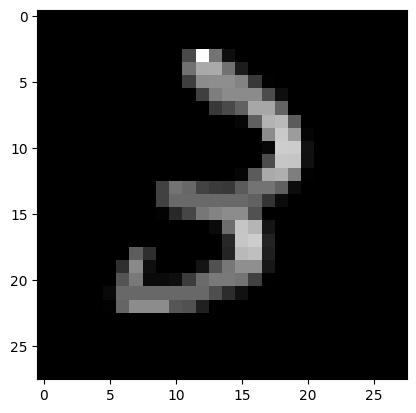

In [18]:
plt.imshow(X_test[63], cmap='gray')

In [19]:
y_pred = new_model.predict(X_test)
y_pred_class = np.argmax(y_pred, axis = 1)
print(y_test[63], y_pred_class[63])

313/313 [==============================] - 1s 2ms/step
3 3


In [20]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
